In [14]:
""" 
    Skeleton code for k-means clustering mini-project.
"""
import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../P3_Unsupervised_learning/tools/")
from feature_format import featureFormat, targetFeatureSplit

%matplotlib inline

In [15]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()


In [16]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../P3_Unsupervised_learning/final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [17]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
#poi, finance_features = targetFeatureSplit( data )
data1 = featureFormat(data_dict, features_list[:3] )
data2 = featureFormat(data_dict, features_list )


In [18]:
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
# for f1, f2 in finance_features:
#     plt.scatter( f1, f2)
# plt.show()


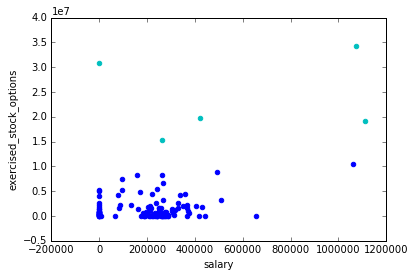

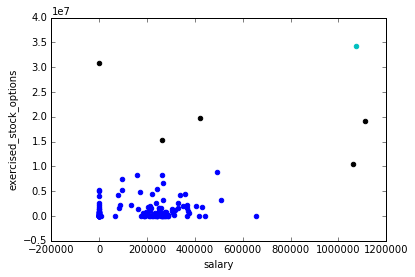

In [19]:
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
from sklearn.cluster import KMeans


poi, finance_features = targetFeatureSplit( data1 )
pred1 = KMeans(n_clusters = 2).fit_predict(finance_features)

### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred1, finance_features, poi, mark_poi=False, name="clusters_2.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"
    
#################### with three features ################################

poi, finance_features = targetFeatureSplit( data2 )
pred2 = KMeans(n_clusters = 3).fit_predict(finance_features)

### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred2, finance_features, poi, mark_poi=False, name="clusters_3.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

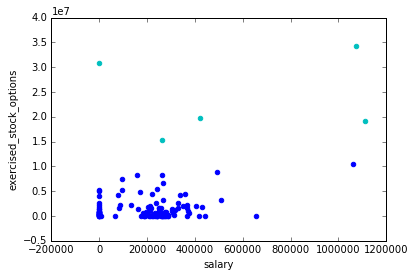

In [20]:
#Now using 2 features plus scaling
from sklearn.preprocessing import MinMaxScaler

feature_1 = "salary"
feature_2 = "exercised_stock_options"

data = featureFormat(data_dict, ["poi", feature_1, feature_2])
poi, finance_features = targetFeatureSplit( data )

pred = KMeans(n_clusters = 2).fit_predict(finance_features)

###
try:
    Draw(pred1, finance_features, poi, mark_poi=False, name="clusters_2_scaled.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"


In [43]:
## Examining scaled features ##

## Helper
def getList(feature):
    l = [data_dict[key][feature] for key in data_dict] # extracting salaries
    l = [x for x in l if x != 'NaN']                     # removing NaNs
    return l

salaries = getList('salary')
min_s = min(salaries)
max_s = max(salaries)

# A salary of 200,000 is scaled as
print (200000.- min_s)/(max_s - min_s)
print '---\n'
##

estock_ops = getList('exercised_stock_options')
min_op = min(estock_ops)
max_op = max(estock_ops)

# A stock option of 1 million would scale as
print (1e6 - min_op)/(max_op - min_op)
print '---\n'
##

################
from_mess = getList('from_messages')
print min(from_mess), max(from_mess)
print min_s, max_s

0.17962406631
---

0.0290205889347
---

12 14368
477 1111258
